In [1]:
#!git clone https://github.com/ZHKKKe/MODNet

Cloning into 'MODNet'...


In [1]:
import numpy as np
#pip install numpy
#pip install --upgrade pip
#pip install --upgrade Pillow
#braucht man nicht pip install torch
#braucht man nicht pip install torchvision
#ging nicht conda install -c pytorch torchvision cudatoolkit=10.1 pytorch
#pip install torch===1.5.0 torchvision===0.6.0 -f https://download.pytorch.org/whl/torch_stable.html
from PIL import Image
import torch
import torchvision.transforms as transforms
from src.models.modnet import MODNet

ModuleNotFoundError: No module named 'torch'

In [1]:
!python -m Coding.inference \
        --input-path PicInput \
        --output-path PicOutput \
        --ckpt-path ./Model/modnet_photographic_portrait_matting.ckpt

Process image: 2b18006312c53851b31a8f908f121905.jpg
Process image: Daddys-Girl-Frontpage-scaled.jpg
Process image: H2x1_NSwitch_DragonBallZKakarotANewPowerAwakensSet_image1600w.jpg
Process image: imago62618181h.jpg
Process image: retriever112_v-contentgross.jpg
Process image: single-mit-kinderwunsch.jpg
Process image: Symbol_Thumbnail.png
Process image: wie-viele-hunde-kann-man-halten-full-818x522.jpg


C:\Users\Rybak\.conda\envs\ML_RemoveBackground\lib\site-packages\torch\nn\functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


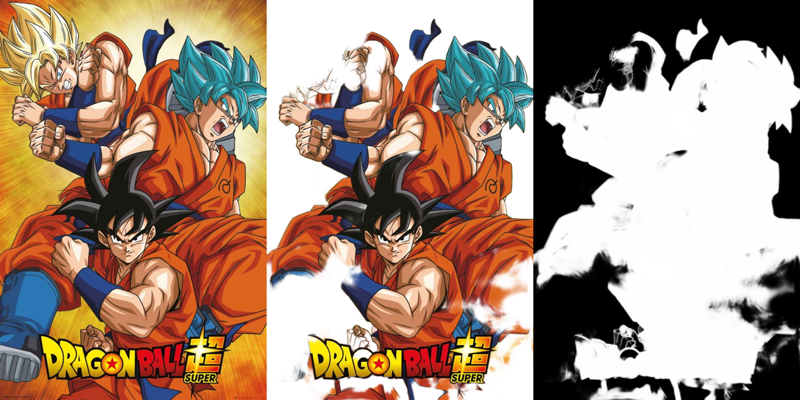

2b18006312c53851b31a8f908f121905.jpg 



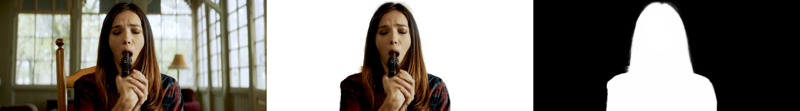

Daddys-Girl-Frontpage-scaled.jpg 



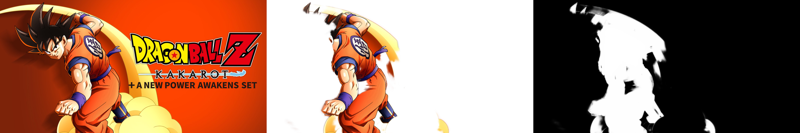

H2x1_NSwitch_DragonBallZKakarotANewPowerAwakensSet_image1600w.jpg 



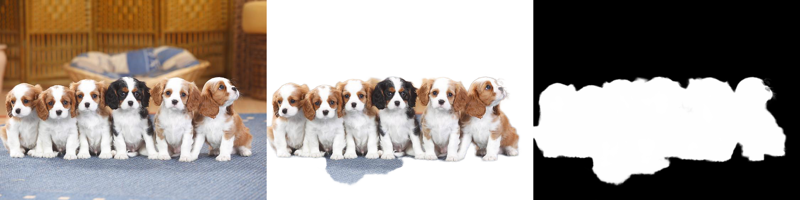

imago62618181h.jpg 



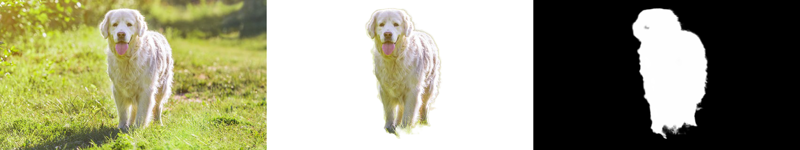

retriever112_v-contentgross.jpg 



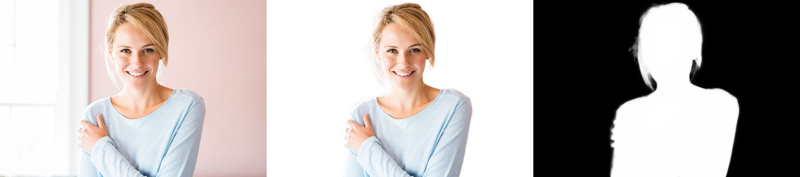

single-mit-kinderwunsch.jpg 



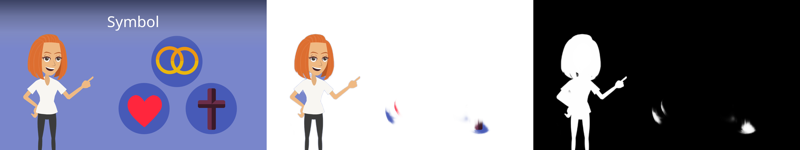

Symbol_Thumbnail.png 



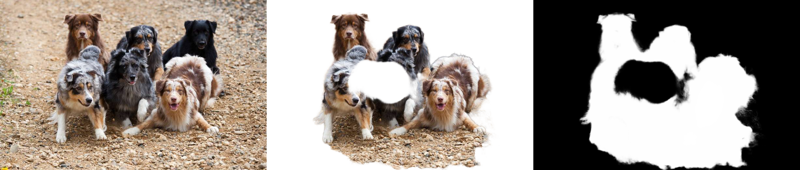

wie-viele-hunde-kann-man-halten-full-818x522.jpg 



In [2]:
import numpy as np
import os
from PIL import Image
input_folder = "PicInput"
output_folder = "PicOutput"

def combined_display(image, matte):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))
  
  # obtain predicted foreground
  image = np.asarray(image)
  if len(image.shape) == 2:
    image = image[:, :, None]
  if image.shape[2] == 1:
    image = np.repeat(image, 3, axis=2)
  elif image.shape[2] == 4:
    image = image[:, :, 0:3]
  matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
  foreground = image * matte + np.full(image.shape, 255) * (1 - matte)
  
  # combine image, foreground, and alpha into one line
  combined = np.concatenate((image, foreground, matte * 255), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined

# visualize all images
image_names = os.listdir(input_folder)
for image_name in image_names:
  matte_name = image_name.split('.')[0] + '.png'
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(output_folder, matte_name))
  display(combined_display(image, matte))
  print(image_name, '\n')
